# Docker For the Modern Data Scientists: 8 Concepts You Can't Ignore in 2023
## A guide rich with visuals
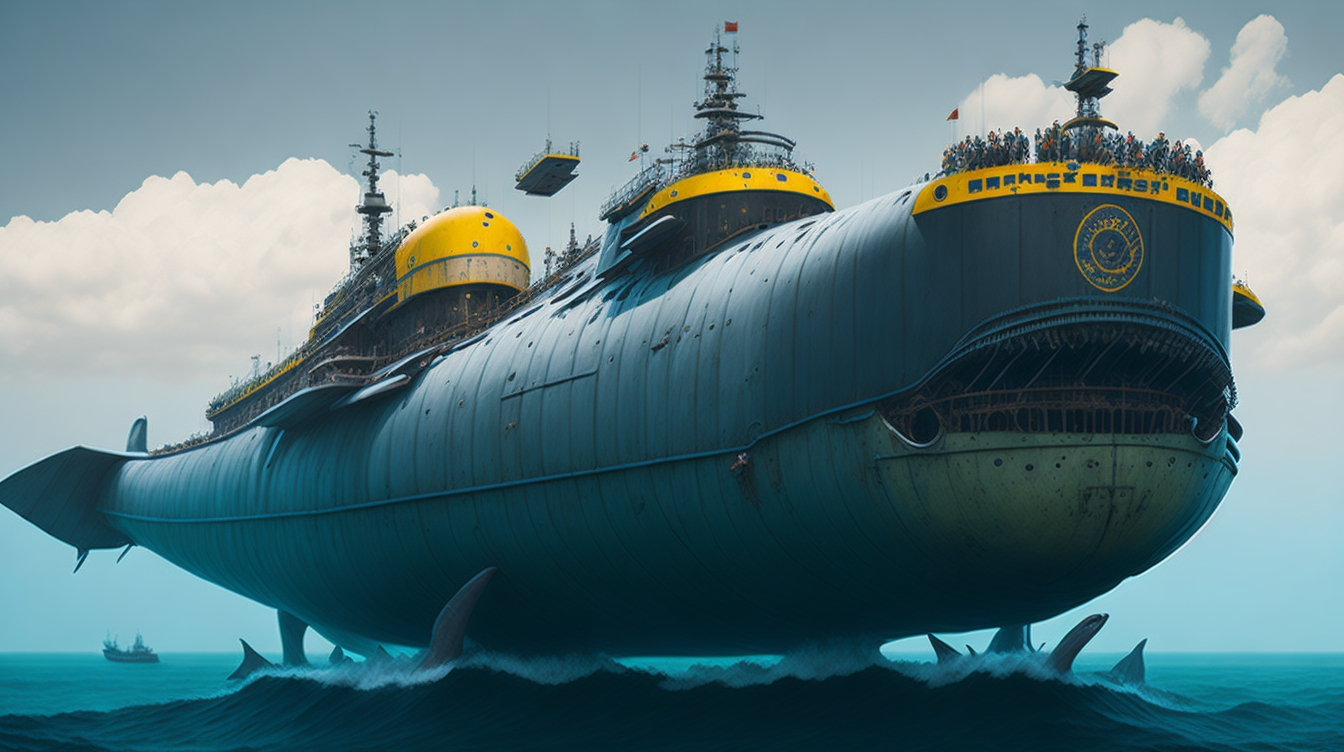

### The story

This is by far one of the funniest memes I've ever seen:

https://twitter.com/gerardsans/status/1413936148846727179?s=20

It touches on one of the most painful problems not just in data science and ML but in all of programming - sharing applications/scripts and making the darn things work in others' machines as well.

Drumroll please... After days of effort, I managed to whip up the Awesome Model for my project. Now, I want to share it with my awesome colleagues and possibly, the rest of the awesome world.

With excitement coursing to the tip of my hair, I send the model and its dependencies in a ZIP file. Within minutes, my inbox is filled with questions like:

- Can I run it on Linux or M1 or Windows 7? How I about my toaster? - I have a really powerful toaster.
- What should be my Python version? 
- Do I need a GPU? If yes, why didn't you include the drivers?
- Does it move when I touch it?
- KMN!
- I am getting an error that says I am stupid, what should I do?
- Hey, I think you made a mistake in line 1386, shouldn't it be like this?
- It says there is no environment variable called SECRET_SAUCE. Where can I get one?

...

In this scenario, I have no one but myself to blame. The problem of making 

### 0. Why not ZIP files?

Why learn a totally new tool when you can put all the code and datasets for your model into a zip file and share that? Well, that would be the same as sending the legos to build a car via mail instead of just driving the ready car to your friend's house. 

There are many excellent reasons to consider Docker above zip files or other methods:

0. **Dependency and compatibility chaos**: zip files don't care about the host system. They are like globetrotting tourists who expect all machines to speak their language. But different operating systems have different architectures and they will be a massive issue for different libraries and dependencies and their versions.
1. **Reproducibility woes**: Imagine things break when you share your zip file. Is it because of a bug or an environment issue? This will just lead to hours of debugging that will make even the most patient person scream-swear. 
2. **Isolation illusion**: You don't really know the contents of a zipfile beforehand and unpacking it is like releasing a bunch of mischievous mice into your operating system. You don't know where they will run and make a mess. People with malicious intent can take advantage of such chaos in the form of attacks.
3. **Deployment dilemmas**: deploying models from zip files requires tedious manual configuration, environment setup and managing dependencies. It is like building a house from scratch every time you move to a new city. 

In short, while zip files may look like the easiest way to share applications, they can't match the power of Docker containers.

But what *is* a container, you ask? Let's answer that next.

### 1. Container

Containers are like mini-operating systems on your machine, isolated from other processes and applications such as Spotify, Chrome, Photoshop, games, you name it. They have access to your machine's resources, including RAM, CPU, Disk, and sometimes even GPUs, allowing them to run any software with custom configurations. 

These lightweight and portable computing environments are tailored to provide everything a machine learning model needs to run in isolation without disrupting the processes on the host machine. They only use limited resources to run themselves, leaving the rest of your machine unaffected.

Another key advantage is that containers ensure identical results over time. Whether it's a day, month, or year, the outputs will remain consistent for the same inputs. And it's not just the consistency over time; containers also offer consistency anywhere. They run identically on your laptop, your neighbor's rusty Windows machine, or even in the clouds. 

Another benefit is that containers provide a high level of security and isolation. Even if you make a mess inside a container, rest assured that the mess won't leak out to the rest of your machine or impact other containers. Everything is nicely _contained_ within the container.

Also, containers are lightweight, requiring minimal resources compared to alternatives like virtual machines. This makes them highly efficient, allowing you to run instances of entire operating systems such as Ubuntu, Debian, and CentOS Linux processes on top of your operating system.

There are many tools that work with containers but of course, the best is Docker. It is an open source project with millions of users and a go-to tool to create, manage and run any application as a container.

### 2. Virtualization

So, how can containers have so many excellent features without overwhelming their host?

The answer lies in virtualization technology. Virtualization creates isolated environments within the host operating system, allowing multiple containers to run independently and efficiently.

Virtualization splits up the host resources (CPU, RAM, Disk) and make each piece look like a separate resource to the software running them. For example, a 64GB RAM can be virtualized to look like four individual 16GB RAMs.

Unlike virtual machines (VMs) that achieve many of the same goals as containers and perform virtualization down to the hardware level, containers only virtualize at the software level. They leverage the host operating system's kernel and share the underlying OS resources.

This approach provides lightweight and efficient virtualization, allowing multiple containers to run side by side on a single host. There won't be much overhead in starting and stopping containers, which makes it much faster to update and distribute them.

### 3. Image

While working with Docker, you will often come across the terms _image_ and _container_ being used seemingly interchangeably. But there are certain differences.

A Docker image is like a food recipe containing meticulous instructions and steps to run an application. A Docker container, on the other hand, is a recipe come to life - a fully prepared dish you can consume. 

A single image can have multiple running instances as containers. But as a rule, even if you have multiple running containers from the same image, they won't interact with each other or even know their existence.

For your own projects, you will usually build the images by yourself. But for many tasks, there are already many pre-built images from the community. 

For example, Docker Hub is the biggest registry, containing more than a million images, all a single terminal command away to use on your machine (after you have Docker installed of course).

It contains official images for many software such as operating systems (Ubuntu, CentOS, Debian), stacks and languages (Node.js, Python, MySQL, Nginx), databases, pre-packaged and installed ML frameworks (TensorFlow, PyTorch with GPU access, Sklearn) and so on.

For example, to download the official release candidate for Python 3.12 and start using it on your machine, you just have to run the following two commands:

```python
$ docker pull python:3.12-rc-bullseye
$ docker run -it python:3.12-rc-bullseye
```

The last command will start an interactive terminal as soon as a container starts from the `python:3.12-rc-bullseye` image. This instance of a running container will be like a mini-operating system that only has Python 3.12 installed, nothing else. 

But treating the container like any other Ubuntu distribution, you can install additional software like Git, Conda and pretty much do many things you can do in Ubuntu but without a graphical user interface (GUI).

### 4. Dockerfile

When we call `docker pull` and `docker run python`, how does the container know where to get the binaries for Python 3.12, all its dependencies and install them?

The answer lies in Dockerfiles. They are text files serving as blueprints or recipes for creating custom images that encapsulate our Python scripts or machine learning models along with their dependencies and configuration.

You will use Dockerfiles extensively when creating your images (one Dockerfile for one directory/project). While they can get pretty large for complex projects, they typically have the following commands for Python projects:

```Docker
# Use an official Python runtime as the base image
FROM python:3.9-slim

# Set the working directory inside the container
WORKDIR /app

# Copy the requirements file to the container
COPY requirements.txt .

# Install the required Python packages
RUN pip install --no-cache-dir -r requirements.txt

# Copy the rest of the application code to the container
COPY . .

# Define the command to run when the container starts
CMD ["python", "train.py"]
```

Above is a sample Dockerfile to containerize a `train.py` Python script located in our current working directory. Here is an overview of the commands:

1. `FROM` - a keyword to specify a base image. Base images are pre-built images on Docker Hub you can use in your custom images without having to reinvent the wheel. Above, we are using Python 3.9 base image so that we don't have to install Python manually with `apt-get`.
2. `WORKDIR` - sets the working directory inside the container to `/app`, where the application files, `train.py`, `requirements.txt` will be copied.
3. `RUN` - after this keyword, you can write any valid terminal command like `pip install` to perform certain tasks when building containers.
4. `CMD` - specifies the command to run when the container stars with `docker start`. In this case, it trains a new model with `python train.py`.

As you've observed, Dockerfile syntax is not entirely alien to someone who has been using YAML files or the terminal.

### Image layers

### Image cache

### Docker daemon

### Docker clients

### Docker engine

### Related tools
- Docker hub
- Docker compose
- Kubernetes

### Conclusion